In [23]:
import tensorflow as tf
import pandas as pd
%matplotlib inline

In [44]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1Ngwde6mziKecl_j2dCmyG5plFJ9XJzLS' -O "one_hot_fb_post.csv"

--2020-05-12 04:50:17--  https://docs.google.com/uc?export=download&id=1Ngwde6mziKecl_j2dCmyG5plFJ9XJzLS
Resolving docs.google.com (docs.google.com)... 64.233.189.102, 64.233.189.138, 64.233.189.113, ...
Connecting to docs.google.com (docs.google.com)|64.233.189.102|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0s-64-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/23n54biplc167er2li0p29f9mpn8pnoc/1589259000000/07086883988310421371/*/1Ngwde6mziKecl_j2dCmyG5plFJ9XJzLS?e=download [following]
--2020-05-12 04:50:17--  https://doc-0s-64-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/23n54biplc167er2li0p29f9mpn8pnoc/1589259000000/07086883988310421371/*/1Ngwde6mziKecl_j2dCmyG5plFJ9XJzLS?e=download
Resolving doc-0s-64-docs.googleusercontent.com (doc-0s-64-docs.googleusercontent.com)... 108.177.125.132, 2404:6800:4008:c01::84
Connecting to doc-0s-64-docs.googleusercontent.com (doc-0s-64-

In [1]:
vocab_size = 1000
embedding_dim = 12
max_length = 64
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_portion = 1.0

In [2]:
sentences = []
labels = []
stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]
# print(len(stopwords))

In [3]:
import csv
with open("1500_FB_ads_GoldLabel.csv", 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    for row in reader:
        #print(row[8],row[12])
        labels.append(str(row[10]))
        sentence = row[0]
        for word in stopwords:
            token = " " + word + " "
            sentence = sentence.replace(token, " ")
        sentences.append(sentence)

In [4]:
sentences[0]

'gulf oman incident pretext war iran war unmitigated disaster united states iran region world unilateral attack iran illegal unconstitutional'

In [127]:
df = pd.read_csv('1500_FB_ads_GoldLabel.csv')
df.head()

,text,label,economic,environment,foreign policy,governance,immigration,military,safety,social programs,social and cultural
0,gulf oman incident pretext war iran war unmiti...,foreign policy,0,0,1,0,0,0,0,0,0
1,girlboss love good conversation women sideline...,"economic,social and cultural",1,0,0,0,0,0,0,0,1
2,problem massive urgent global climate change s...,environment,0,1,0,0,0,0,0,0,0
3,friend hope clear women history month matters ...,"economic,social and cultural",1,0,0,0,0,0,0,0,1
4,ten days ll stage debate 2 3 democratic voters...,social programs,0,0,0,0,0,0,0,1,0


In [128]:
train_sentences = sentences[:]
train_labels = labels[:]

print(len(train_sentences))
print(len(train_labels))
print(train_sentences[0])
print(train_labels[0])

1499
1499
gulf oman incident pretext war iran war unmitigated disaster united states iran region world unilateral attack iran illegal unconstitutional
0


In [129]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, padding=padding_type, maxlen=max_length)


In [130]:
import numpy as np
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)

training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels))


print(training_label_seq[0])
print(training_label_seq[1])
print(training_label_seq[2])
print(training_label_seq.shape)


[1]
[2]
[1]
(1499, 1)


In [131]:
print(train_padded[0])
print(training_label_seq[1])

[  1   1   1   1 196 868 196   1 782 101  50 868   1  82   1 305 868 974
 869   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]
[2]


In [132]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 64, 12)            12000     
_________________________________________________________________
global_average_pooling1d_7 ( (None, 12)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 24)                312       
_________________________________________________________________
dense_15 (Dense)             (None, 6)                 150       
Total params: 12,462
Trainable params: 12,462
Non-trainable params: 0
_________________________________________________________________


In [133]:
num_epochs = 20
history = model.fit(train_padded, training_label_seq, epochs=num_epochs, verbose=1)

Train on 1499 samples
Epoch 1/20
1499/1499 [==============================] - 0s 301us/sample - loss: 1.5968 - accuracy: 0.8446
Epoch 2/20
1499/1499 [==============================] - 0s 57us/sample - loss: 1.0532 - accuracy: 0.8659
Epoch 3/20
1499/1499 [==============================] - 0s 59us/sample - loss: 0.5820 - accuracy: 0.8659
Epoch 4/20
1499/1499 [==============================] - 0s 79us/sample - loss: 0.4569 - accuracy: 0.8659
Epoch 5/20
1499/1499 [==============================] - 0s 84us/sample - loss: 0.4194 - accuracy: 0.8659
Epoch 6/20
1499/1499 [==============================] - 0s 76us/sample - loss: 0.3997 - accuracy: 0.8659s - loss: 0.4004 - accuracy: 0.86
Epoch 7/20
1499/1499 [==============================] - 0s 83us/sample - loss: 0.3890 - accuracy: 0.8659
Epoch 8/20
1499/1499 [==============================] - 0s 69us/sample - loss: 0.3807 - accuracy: 0.8659
Epoch 9/20
1499/1499 [==============================] - 0s 63us/sample - loss: 0.3747 - accuracy: 0.8659

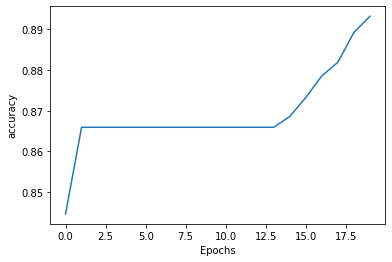

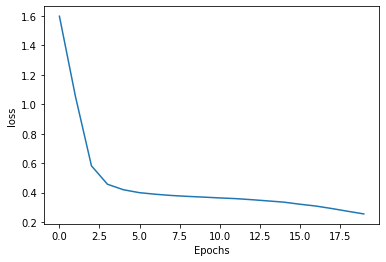

In [134]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [135]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

In [136]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

# Expected output
# (1000, 16)

(1000, 12)


In [137]:
import io

out_v = io.open('vecs8.tsv', 'w', encoding='utf-8')
out_m = io.open('meta8.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [95]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs5.tsv')
  files.download('meta5.tsv')